# **AdvStat4PhysAna - RLab 5**

**Barone Francesco Pio**, student ID: 2058478

28 april 2022

In [1]:
library(tidyr)
library(scales)

<a id='exr1'></a>
## **EXR01** - Inference on Poisson process

In [2]:
data <- c(4, 1, 3, 1, 3)
#data <- c(3, 2, 0, 8, 2, 4, 6, 1) # this is sample data from lecture, for debug purpose

**a |** suppose a **uniform prior** distribution

If the prior is uniform, the posterior becomes
$$\mathcal{P}(\mu|\{y_j\}) \propto \mu^{\sum y_j} e^{-n\mu} = \text{Gamma}\left(\alpha=\sum y_j +1, \lambda = n\right)$$

In [3]:
#  I define this function to compute numerically the median
# of a distribution function.
numerical_median <- function(pdistr, p, dp) {
    integral <- 0.0;   i <- 0;
    while(integral < 0.5) {
        i <- i+1
        integral <- integral + dp*pdistr[i]
    }
    return(p[i-1])
}

# set an optimal plot size
options(repr.plot.width=7, repr.plot.height=6)

In [4]:
# parameters of distribution
post.alpha <- sum(data) + 1   # shape
post.lambda <- length(data)   # rate

# analytical statistics
post.an.mean <- post.alpha/post.lambda
post.an.medn <- '---' # cannot compute median analytically
post.an.var  <- post.alpha/(post.lambda^2)

# computing posterior distribution
dmu <- 0.0005;    mu <- seq(0, 9, dmu);
p.post <- dgamma(shape = post.alpha, rate = post.lambda, mu)

# numerical statistics
post.nu.mean <- dmu*sum(p.post*mu)
post.nu.medn <- numerical_median(p.post, mu, dmu)
post.nu.var  <- dmu*sum(p.post*mu*mu) - post.nu.mean^2

# confidence interval
q_lower <- qgamma(0.025, shape = post.alpha, rate = post.lambda)
q_upper <- qgamma(1 - 0.025, post.alpha, post.lambda)

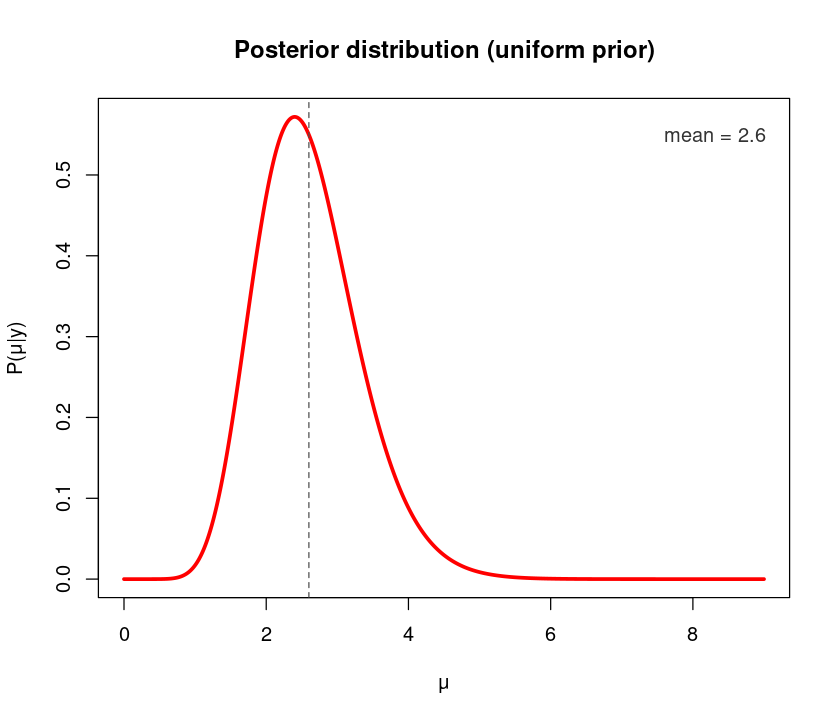

In [5]:
plot(mu, p.post, type="l", lwd=3, col="red", xlab='μ', ylab="P(μ|y)",
     main='Posterior distribution (uniform prior)')
abline(v=post.an.mean, col="grey30", lty=2)
mtext(paste("mean =", round(post.an.mean,3), '   '), 
      3, adj=1, line=-2, col = "grey20")

In [6]:
cat(paste0('Posterior is Gamma(',post.alpha,',',post.lambda,')\n'))

cat('ANALYTICAL\t| ')
cat( paste('mean:', post.an.mean, '  median:', post.an.medn,'  var:', post.an.var, '\n') )

cat('NUMERICAL\t| ')
cat( paste('mean:', post.nu.mean, '  mode:', post.nu.medn ,'  var:', post.nu.var, '\n') )

cat(paste('confidence interval 95%: [', 
          round(q_lower,4), ',', round(q_upper,4),']') )

Posterior is Gamma(13,5)
ANALYTICAL	| mean: 2.6   median: ---   var: 0.52 
NUMERICAL	| mean: 2.59999994849921   mode: 2.533   var: 0.519999790119819 
confidence interval 95%: [ 1.3844 , 4.1923 ]

**b |** suppose a **Jeffrey's prior** distribution

If the prior is Jeffrey's, the posterior becomes
$$\mathcal{P}(\mu|\{y_j\}) \propto \mu^{\sum y_j-1/2} e^{-n\mu} = \text{Gamma}\left(\alpha=\sum y_j +\frac{1}{2}, \lambda = n\right)$$

In [7]:
# parameters of distribution
post.alpha <- sum(data) + 1/2   # shape
post.lambda <- length(data)   # rate

# analytical statistics
post.an.mean <- post.alpha/post.lambda
post.nu.medn <- '---' # cannot compute median analytically
post.an.var  <- post.alpha/(post.lambda^2)

# computing posterior distribution
dmu <- 0.0005;    mu <- seq(0, 9, dmu);
p.post <- dgamma(shape = post.alpha, rate = post.lambda, mu)

# numerical statistics
post.nu.mean <- dmu*sum(p.post*mu)
post.nu.medn <- numerical_median(p.post, mu, dmu)
post.nu.var  <- dmu*sum(p.post*mu*mu) - post.nu.mean^2

# confidence interval
q_lower <- qgamma(0.025, shape = post.alpha, rate = post.lambda)
q_upper <- qgamma(1 - 0.025, post.alpha, post.lambda)

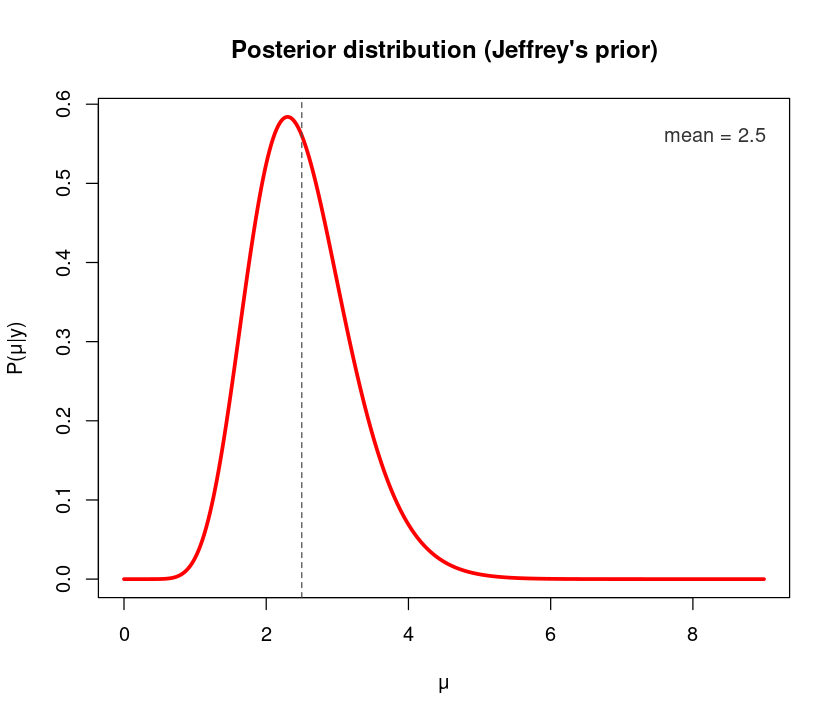

In [8]:
plot(mu, p.post, type="l", lwd=3, col="red", xlab='μ', ylab="P(μ|y)",
     main='Posterior distribution (Jeffrey\'s prior)')
abline(v=post.an.mean, col="grey30", lty=2)
mtext(paste("mean =", round(post.an.mean,3), '   '), 
      3, adj=1, line=-2, col = "grey20")

In [9]:
cat(paste0('Posterior is Gamma(',post.alpha,',',post.lambda,')\n'))

cat('ANALYTICAL\t| ')
cat( paste('mean:', post.an.mean, '  median:', post.an.medn,'  var:', post.an.var, '\n') )

cat('NUMERICAL\t| ')
cat( paste('mean:', post.nu.mean, '  mode:', post.nu.medn ,'  var:', post.nu.var, '\n') )

cat(paste('confidence interval 95%: [', 
          round(q_lower,4), ',', round(q_upper,4),']') )

Posterior is Gamma(12.5,5)
ANALYTICAL	| mean: 2.5   median: ---   var: 0.5 
NUMERICAL	| mean: 2.49999997352031   mode: 2.433   var: 0.499999886893606 
confidence interval 95%: [ 1.312 , 4.0646 ]

**c |** Compare the result with that obtained using a normal approximation for the posterior distribution, with the same mean
and standard deviation.

**NOTE**: I've evaluated the 95% credibility interval above.

Since the results above are similar, I will compare only the posterior with Jeffrey's prior to a normal distribution.

In [10]:
post.alpha <- sum(data) + 1/2   # shape
post.lambda <- length(data)   # rate

dmu <- 0.0005;    mu <- seq(0, 9, dmu);
p.post <- dgamma(shape = post.alpha, rate = post.lambda, mu)

post.an.mean <- post.alpha/post.lambda
post.nu.medn <- numerical_median(p.post, mu, dmu)
post.an.var  <- post.alpha/(post.lambda^2)

p.post.gauss <- dnorm(mu, mean = post.an.mean, sd = sqrt(post.an.var))

confidence interval 95%:
  Gamma  -> [ 1.312 , 4.0646 ]
  Normal -> [ 1.1141 , 3.8859 ]

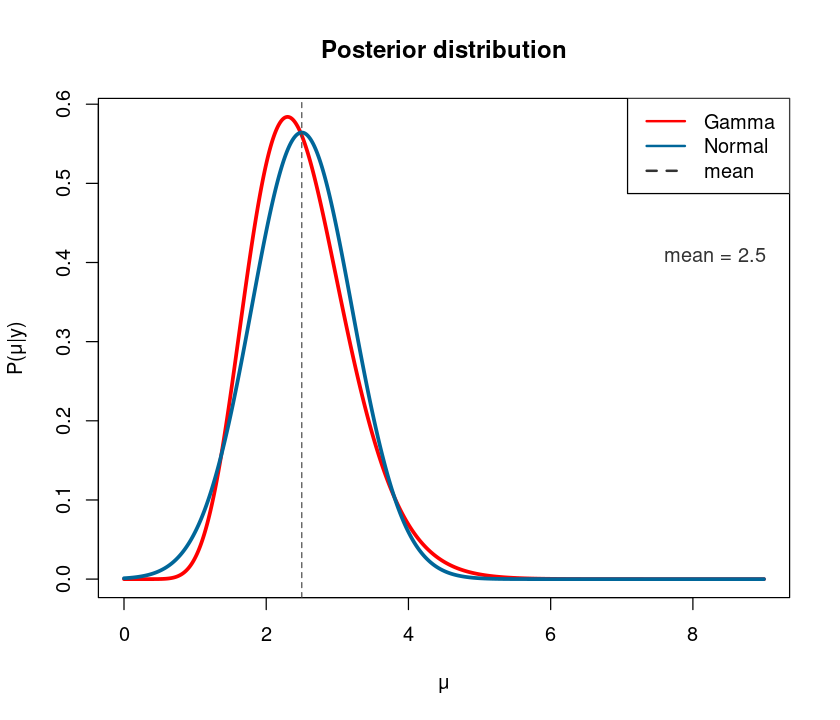

In [11]:
plot(mu, p.post, type="l", lwd=3, col="red", xlab='μ', ylab="P(μ|y)",
     main='Posterior distribution')
lines(mu, p.post.gauss, type="l", lwd=3, col="#006699")
abline(v=post.an.mean, col="grey30", lty=2)
mtext(paste("mean =", round(post.an.mean,3), '   '), 
      3, adj=1, line=-7, col = "grey20")

legend('topright', legend = c("Gamma", "Normal", "mean"), y.intersp=1.2,
       col = c("red","#006699","grey20"), lty=c(1,1,2), lwd = 2)


# compute confidence intervals
q_lower <- qgamma(0.025, shape = post.alpha, rate = post.lambda)
q_upper <- qgamma(1 - 0.025, post.alpha, post.lambda)
cat(paste('confidence interval 95%:\n  Gamma  -> [', 
          round(q_lower,4), ',', round(q_upper,4),']') )
q_lower <- qnorm(0.025, mean = post.an.mean, sd = sqrt(post.an.var))
q_upper <- qnorm(1 - 0.025, mean = post.an.mean, sd = sqrt(post.an.var))
cat(paste('\n  Normal -> [',
          round(q_lower,4), ',', round(q_upper,4),']') )

**Summary of the results**

| prior | posterior | mean | median | stdev | confidence 95 |
| --- | --- |:---:|:---:|:---:|:---:|
| uniform | Gamma(13,5) | 2.6  | 2.53 | 0.721 |  [1.3844, 4.1923] |
| Jeffrey |Gamma(12.5,5) | 2.5  | 2.43 | 0.707 |  [1.312, 4.0646] |
| Jeffrey | Normal | 2.5  | 2.5 | 0.707 |  [1.1141, 3.8859] |

<a id='exr2'></a>
## **EXR02** - Lighthouse

In [12]:
set.seed(221527)
# fix the lighthouse position
alpha0 <- 1
beta0 <- 5

In [13]:
# shore detectors sampling
n <- 60
x <- rcauchy(n, alpha0, beta0)

# parameter space to probe
alpha.range.max <- 7;   alpha.range.min <- -7;
beta.range.max <- 10;    beta.range.min <- 0;

alpha.d <- 0.01
alphas <- seq(alpha.range.min, alpha.range.max, alpha.d)

beta.d <- 0.01
betas <- seq(beta.range.min, beta.range.max, beta.d)

For the Lighthouse problem it holds
$$P(x_k|\alpha,\beta) = P(\theta|\alpha,\beta)\left| \frac{d\theta}{dx_k}\right| = \frac{1}{\pi}\frac{\beta}{\beta^2+(x_k-\alpha)^2}$$

Assuming a uniform prior, the posterior probability function is simply proportional to $\prod_k P({x_k}|\alpha,\beta)$. **We proceed in the fascion of optimizing the logarithmic posterior $L$**, as $P$ over a dataset $D=\{x_k\}$ becomes a sum in logarithm coordinates. Eventually, we take back the exponential.

$$L = \log\left[ P(\alpha|D, B) \right] = \sum_k \log\left[ \frac{\beta}{\beta^2+(x_k-\alpha)^2} \right]$$

Notice that, with respect to the example seen at lecture, we are also varying $\beta$. Therefore, we keep it inside the function to optimize.

In [14]:
# let us follow the fashion of minimizing the logarithmic posterior
posterior.log <- function(data, a, b) {
    tmp <- sum( log( b/(b^2 + (data-a)^2) ) )
    return(tmp)
}

# preallocate
z <- matrix(data=NA, nrow=length(alphas), ncol=length(betas))

# compute
for(j in 1:length(alphas))
    for(k in 1:length(betas))
        z[j,k] <- posterior.log(x, alphas[j], betas[k])

#z[is.nan(z)] = -Inf
z <- z-max(z, na.rm=TRUE)
z <- exp(z)

max.idx <- which(z == max(z, na.rm=TRUE), arr.ind = TRUE)
max.alpha = alphas[max.idx[1]];  max.beta = betas[max.idx[2]];
cat(paste0('max point is (', max.alpha,', ', max.beta,')') )

max point is (1.86, 5.54)

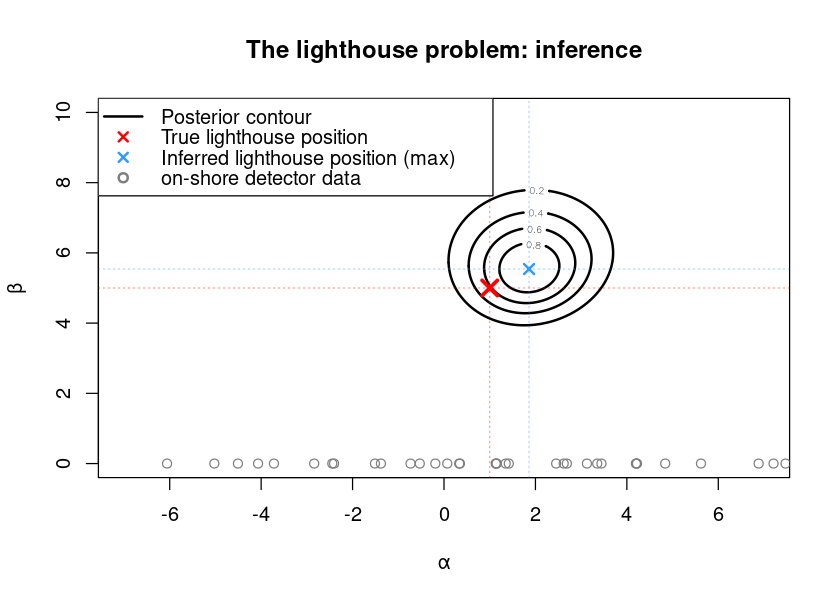

In [15]:
options(repr.plot.width=7, repr.plot.height=5)

# plot un-normalized 2D posterior as contours
contour(alphas, betas, z,#exp(z),
        nlevels = 5, labcex = 0.5, lwd = 2,
        xlab="α",   ylab="β",
        main='The lighthouse problem: inference')

truemarker.color = 'red'
points(alpha0, beta0, pch = 4, lwd=3, cex=1.7, col=truemarker.color)
abline(v=alpha0,h=beta0, col=alpha(truemarker.color, 0.4), lty=3)

maxmarker.color = "#3399FF"
points(max.alpha, max.beta, pch = 4, lwd=2, cex=1.1, col=maxmarker.color)
abline(v=max.alpha,h=max.beta, col=alpha(maxmarker.color, 0.4), lty=3)

data.color = 'grey50'
points(x, rep(0, each=n), pch = 1, lwd=1, cex=1, col=data.color)

legend('topleft', legend = c("Posterior contour", 
                             "True lighthouse position", 
                             "Inferred lighthouse position (max)",
                             "on-shore detector data"),
       y.intersp=1.3, lty=c(1,NA,NA,NA), lwd = 2, pch=c(NA,4,4,1),
       col = c("black",truemarker.color, maxmarker.color,data.color) )

Now I will create several similar plots, but changing the number of samples.

**Note:** In lecture notes \#6 we were asked to "plot the posterior as a function of the number of collected data $n$". It is not asked in the homework assignment, but I will do it as well.

In [16]:
# shore detectors sampling
n <- 120
data <- rcauchy(n, alpha0, beta0)

running n = 1 
running n = 2 
running n = 5 
running n = 10 
running n = 20 
running n = 50 
running n = 100 


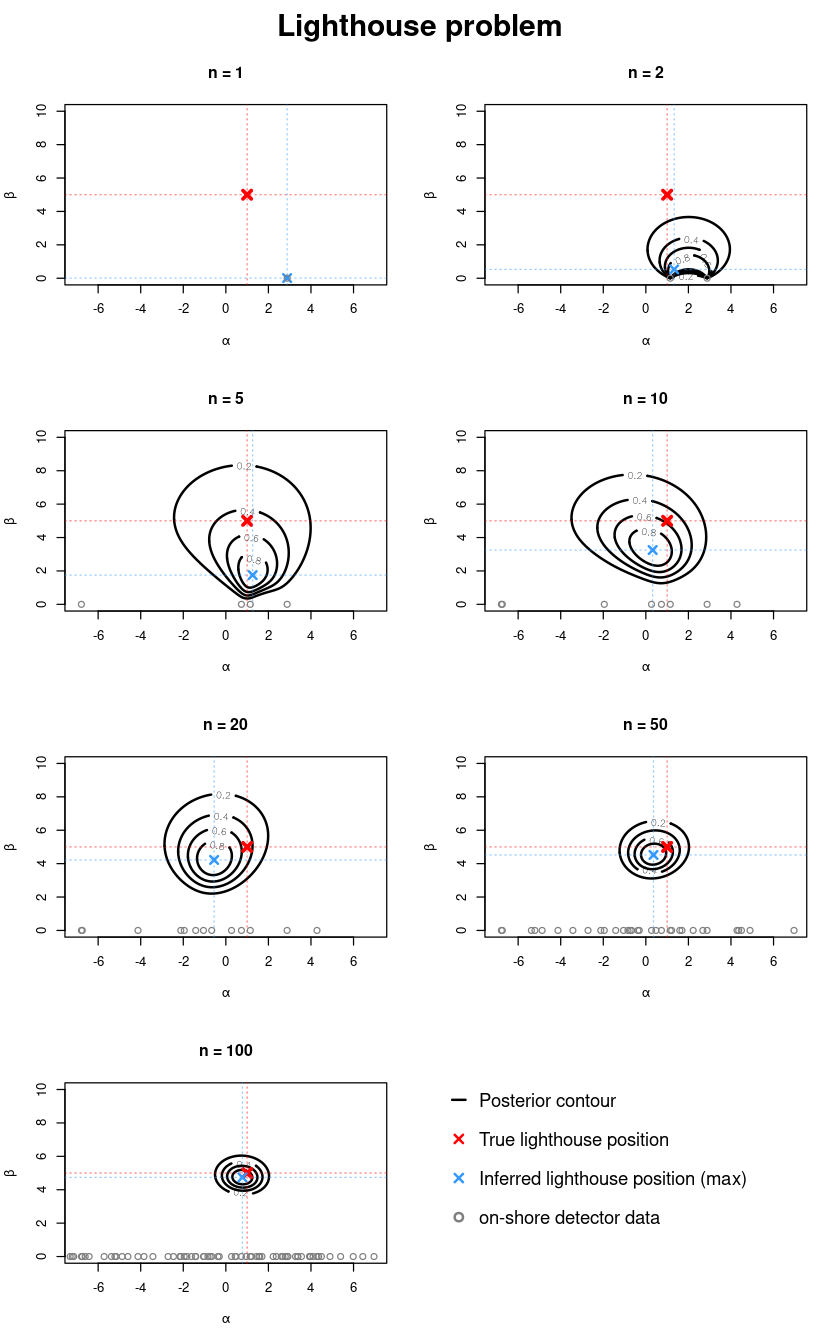

In [17]:
n.totest <- c(1, 2, 5, 10, 20, 50, 100)

old_par <- par()
par( mfrow=c(4, 2), oma=c(0, 0, 2.5, 0) )
options(repr.plot.width=7, repr.plot.height=11.2)

for(nt in n.totest) {
    cat( paste('running n =', nt,'\n') )
    x <- data[1:nt]  # restricting data
    
    ####  do things as above  ####
    z <- matrix(data=NA, nrow=length(alphas), ncol=length(betas))

    for(j in 1:length(alphas))
        for(k in 1:length(betas))
            z[j,k] <- posterior.log(x, alphas[j], betas[k])

    z <- z - max(z, na.rm=TRUE);   z <- exp(z);

    max.idx <- which(z == max(z, na.rm=TRUE), arr.ind = TRUE)
    max.alpha = alphas[max.idx[1]];  max.beta = betas[max.idx[2]];
    
    contour(alphas, betas, z,
            nlevels = 5, labcex = 0.5, lwd = 2,
            xlab="α",   ylab="β",
            main=paste('n =',nt))

    points(alpha0, beta0, pch = 4, lwd=3, cex=1.4, col=truemarker.color)
    abline(v=alpha0,h=beta0, col=alpha(truemarker.color, 0.5), lty=3)

    points(max.alpha, max.beta, pch = 4, lwd=2, cex=1.3, col=maxmarker.color)
    abline(v=max.alpha,h=max.beta, col=alpha(maxmarker.color, 0.5), lty=3)

    points(x, rep(0, each=nt), pch = 1, lwd=1, cex=1, col=data.color)
}

mtext('Lighthouse problem', outer = TRUE, cex = 1.5, font=2)
par(fig = c(0, 1, 0, 0.35), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
legend('bottomright', legend = c("Posterior contour", 
                                 "True lighthouse position", 
                                 "Inferred lighthouse position (max)",
                                 "on-shore detector data"),
       y.intersp=0.0002, lty=c(1,NA,NA,NA), lwd = 2, pch=c(NA,4,4,1),
       col = c("black",truemarker.color, maxmarker.color,data.color),
       xpd = TRUE, horiz = FALSE, cex = 1.4, seg.len=1, bty = 'n')

<a id='exr3'></a>
## **EXR03** - Signal over Background

**a |** vary the sampling resolution $w$ keeping the same sampling range

In [18]:
w_test = c(0.1, 0.25, 1, 2, 3) # resolution factors to test

In [19]:
#  I borrow this part of code from lecture notes, with a good deal of
# changes to make it work iteratively.

# S_k
signal <- function (x, a, b, x0, w, t) {
    #  NOTE: w is the width of distribution, not
    #        the sampling step!!
    t * (a*exp(-(x-x0)^2/(2*w^2)) + b)
}

# Log posterior
log.post <- function (d, x, a, b, x0, w, t) {
    if(a<0 || b<0) { return(-Inf) } # the effect of the prior
    sum( dpois(d, lambda=signal(x, a, b, x0, w, t), log=TRUE) )
}

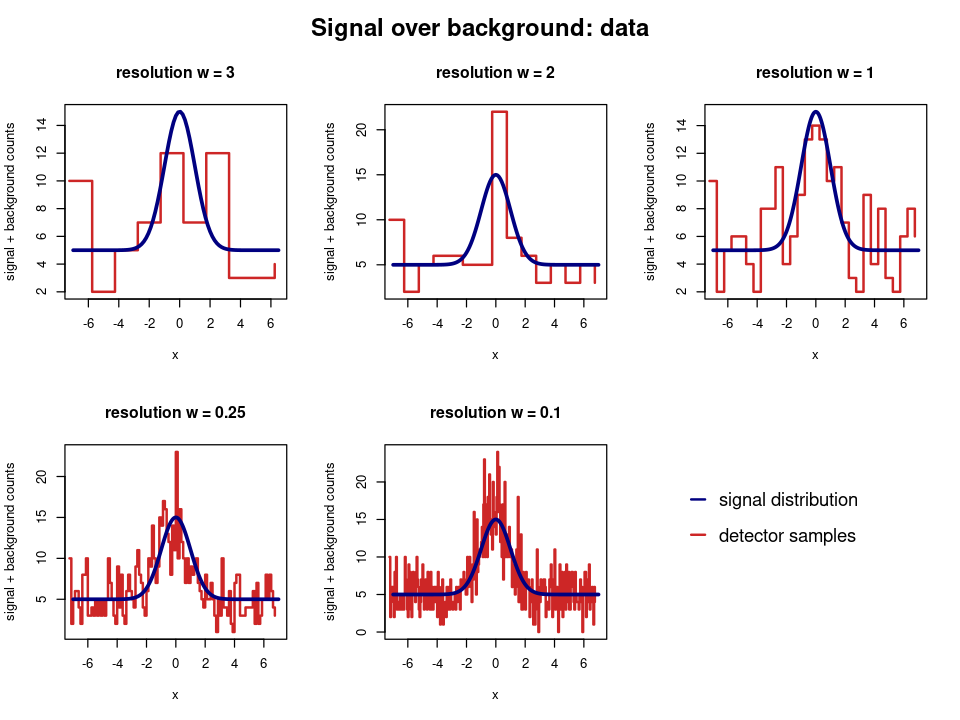

In [20]:
#  Visualize the sampled data at different resolutions

par( mfrow=c(2, 3), oma=c(0, 0, 2.5, 0) )
options(repr.plot.width=8, repr.plot.height=6)

generation_interval = c(-7, 7) # to keep constant

for(ww in rev(w_test) ) {
    # model parameters
    x0 <- 0      # signal peak
    #w <-1       # signal width  # suppressed for iteration
    A.true <- 2  # signal amplitude
    B.true <- 1  # background amplitude
    Delta.t <- 5 # exposure time
    
    # - generate the observed data
    set.seed(205)
    xdat <- seq(from=generation_interval[1], 
                to=generation_interval[2], 
                by=0.5*ww) # change sampling resolution
    s.true <- signal(xdat, A.true, B.true, x0, 1, Delta.t)
    ddat <- rpois( length(s.true), s.true)  
    xdat.off <- xdat - 0.25   # sampled data
    
    # - compute data distribution
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*ww)
    splot <- signal(xplot, A.true, B.true, x0, 1, Delta.t) 
    
    
    plot(xdat.off, ddat, type='s', col='firebrick3', lwd=2,
         xlab = "x", ylab = "signal + background counts",
         xlim = range(xplot), ylim = range(c(splot, ddat)),
         main=paste('resolution w =',ww) )
    
    lines(xplot, splot, type = 'l', col = "navy", lwd=3 )  # distribution
}

mtext('Signal over background: data', outer = TRUE, cex = 1.2, font=2)
par(fig = c(0.5, 1, 0, 0.95), oma = c(0, 0, 0, 0), mar = c(0, 0, 0, 0), new = TRUE)
legend('bottomright', legend = c("signal distribution", 
                                 "detector samples"),
       y.intersp=3, lty=c(1,1), lwd = 2,
       col = c("navy",'firebrick3'),
       xpd = TRUE, horiz = FALSE, cex = 1.4, seg.len=1, bty = 'n')

In [21]:
# since this plot is more elaborated, I code the whole plot inside a function

plot_snr_posterior <- function (ww, A.true, B.true, title = 'Signal over background | posterior') {
    
    options(repr.plot.width=7, repr.plot.height=7)
    area <- matrix( c(3,1,1, 3,1,1, 0,2,2), 
                    nrow=3, byrow=TRUE)
    layout(area)
    par( oma=c(0, 0, 2.5, 0) )
    
    # model parameters
    x0 <- 0      # signal peak
    Delta.t <- 5 # exposure time
    
    # parameter suppressed for iteration
    #w <-1       # signal width  
    #A.true <- 2  # signal amplitude
    #B.true <- 1  # background amplitude
    
    # - generate the observed data
    #set.seed(205)
    xdat <- seq(from=generation_interval[1], 
                to=generation_interval[2], 
                by=0.5*ww) # change sampling resolution
    s.true <- signal(xdat, A.true, B.true, x0, 1, Delta.t)
    ddat <- rpois( length(s.true), s.true)  
    xdat.off <- xdat - 0.25   # sampled data
    
    # - compute data distribution
    xplot <- seq(from=min(xdat), to=max(xdat), by=0.05*ww)
    splot <- signal(xplot, A.true, B.true, x0, 1, Delta.t) 

    # - sampling grid for computing posterior
    alim <- c(max(A.true-2,0), A.true+2)
    blim <- c(max(B.true-0.5,0), B.true+0.5)
    Nsamp <- 100
    uniGrid <- seq(from=1/(2*Nsamp),
                   to=1-1/(2*Nsamp), 
                   by=1/Nsamp)
    delta_a <- diff(alim)/Nsamp
    delta_b <- diff(blim)/Nsamp
    a <- alim[1] + diff(alim)*uniGrid
    b <- blim[1] + diff(blim)*uniGrid
    
    # - compute log unnormalized posterior:
    #    z = ln Pˆ*(a,b|D), on a regular grid
    z <- matrix (data=NA, nrow=length(a), ncol=length(b))
    
    for(j in 1:length(a) )
        for(k in 1:length(b) )
            z[j,k] <- log.post(ddat, xdat, a[j], b[k], x0, 1, Delta.t)

    z <- z - max(z) # set maximum to zero
    
    # - plot unnormalized 2D posterior as contours
    contour(a, b, exp(z), nlevels = 5, labcex = 0.5, lwd = 2, las=1,
            xlab="amplitude, A", ylab="background, B")
    abline(v=A.true,h=B.true, col=alpha('red', 0.5), lty=3)
    
    # Compute normalized marginalized posteriors, P(a|D) and P(b|D)
    # by summing over other parameter. Normalize by gridding.
    p_a_D <- apply(exp(z), 1, sum)
    p_a_D <- p_a_D/(delta_a*sum(p_a_D))
    p_b_D <- apply(exp(z), 2, sum)
    p_b_D <- p_b_D/( delta_b*sum(p_b_D))
    
    # Compute normalized conditional posteriors, P(a|b,D) and P(b|a,D)
    # using true values of conditioned parameters.
    p_a_bD <- exp( Vectorize(log.post, "a")(ddat, xdat, a, B.true,
                                            x0, 1, Delta.t))
    p_a_bD <- p_a_bD/( delta_a*sum(p_a_bD) )
    p_b_aD <- exp( Vectorize(log.post, "b")( ddat, xdat, A.true, b,
                   x0, 1, Delta.t))
    p_b_aD <- p_b_aD/( delta_b*sum(p_b_aD ))
    
    # - plot the 1D marginalized posteriors, sidewise :)
    plot(a, p_a_D, xlab="", yaxs="i", type="l", lwd=2, las=1,
         ylim=1.05*c(0,max(p_a_D[is.finite(p_a_D)], p_a_bD[is.finite(p_a_bD)])), ylab="P(A|D) and P(A|B,D)")
         
    lines(a, p_a_bD, lwd=2, lty=2)
    abline(v=A.true, col="red", lty=3)
    
    plot(p_b_D, b, ylab="", xaxs="i", type="l", lwd=2, las=1,
         xlim=(1.05*c(0,max(p_b_D[is.finite(p_b_D)], p_b_aD[is.finite(p_b_aD)]))), xlab="P(B|D) and P(B|A,D)")
    lines(p_b_aD, b, lwd=2, lty=2)
    abline(h=B.true, col="red", lty=3)
    
    mtext(title, outer = TRUE, cex = 1.2, font=2)
    
    # add legend at bottom of plot
    par(fig = c(0, 0.33, 0, 0.85), new = TRUE)
    legend('bottomright', legend = c("P(A|D), P(B|D)", "P(A|BD), P(B|AD)"),
           y.intersp=2, lty=c(1,2), lwd = 1.5,
           xpd = TRUE, horiz = FALSE, cex = 1.4, seg.len=2, bty = 'n')
}

remember: smaller w implies higher resolution!

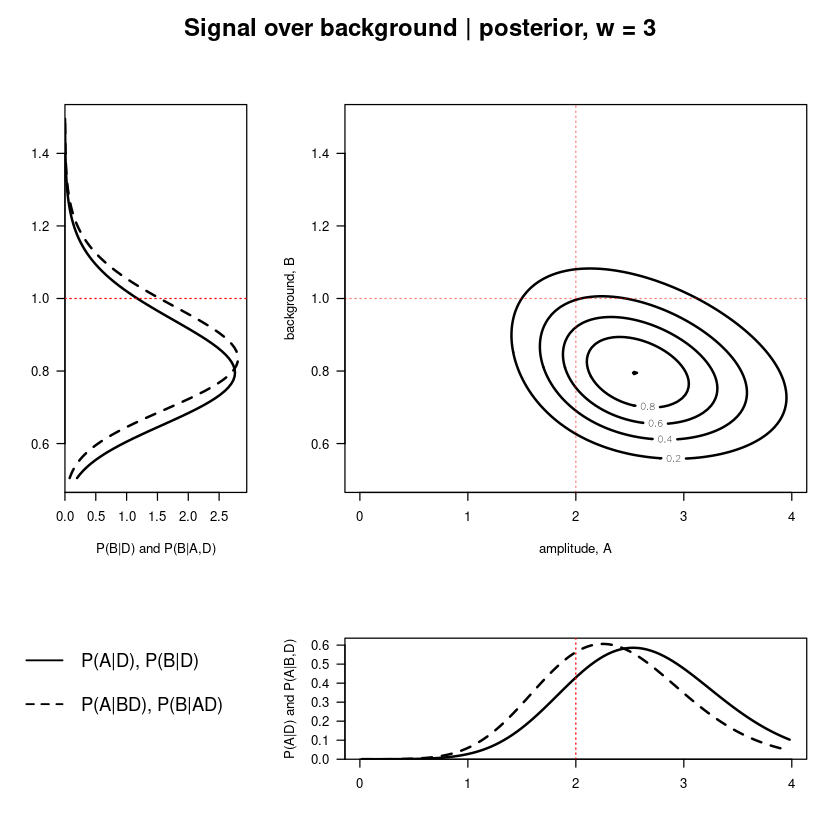

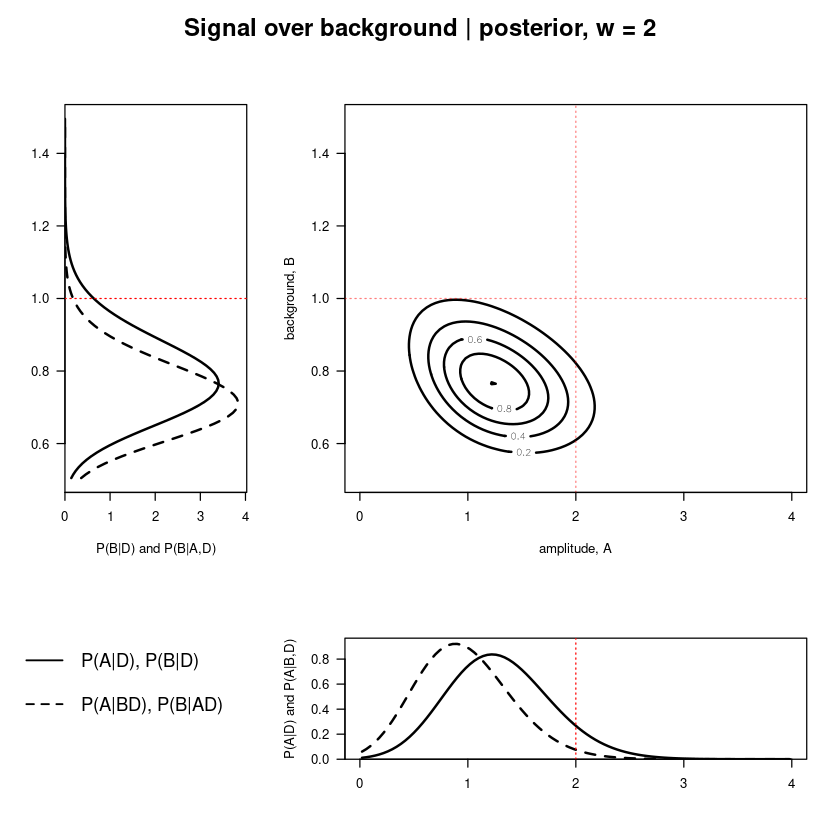

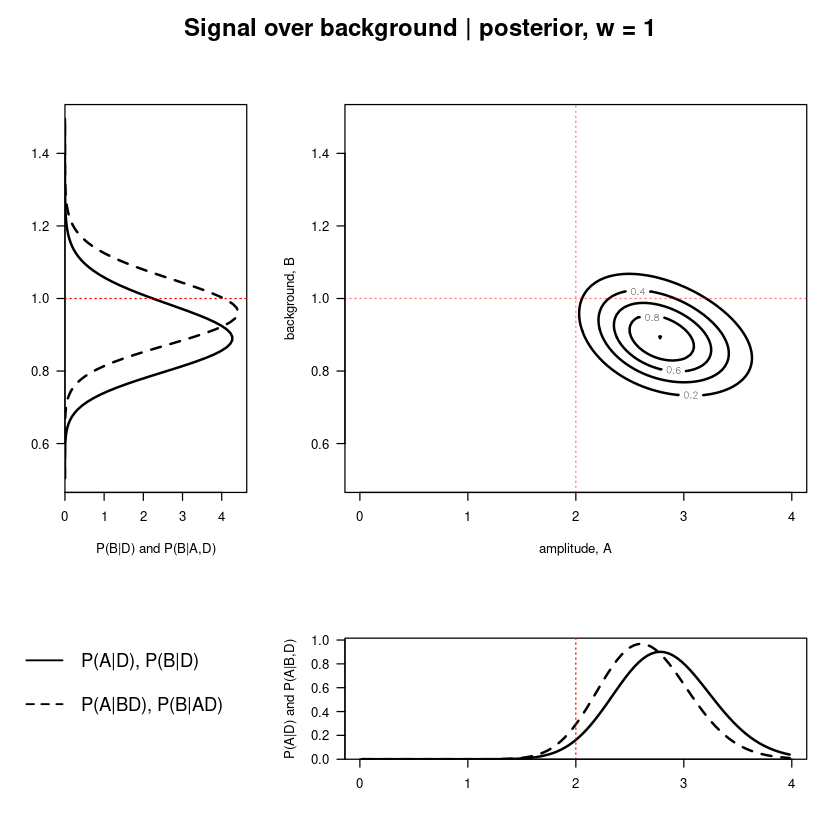

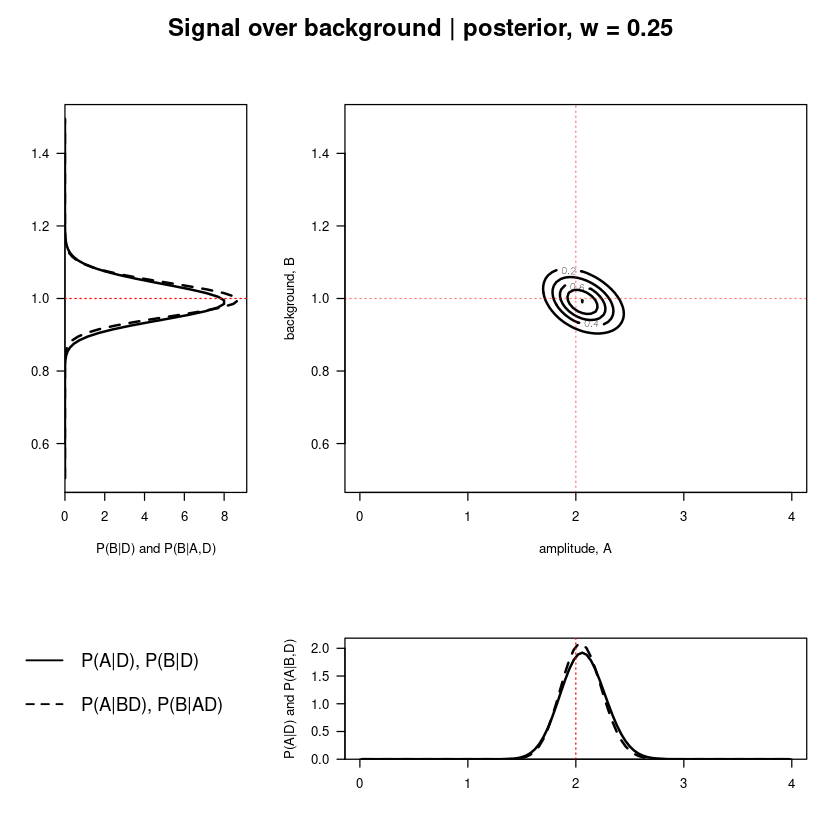

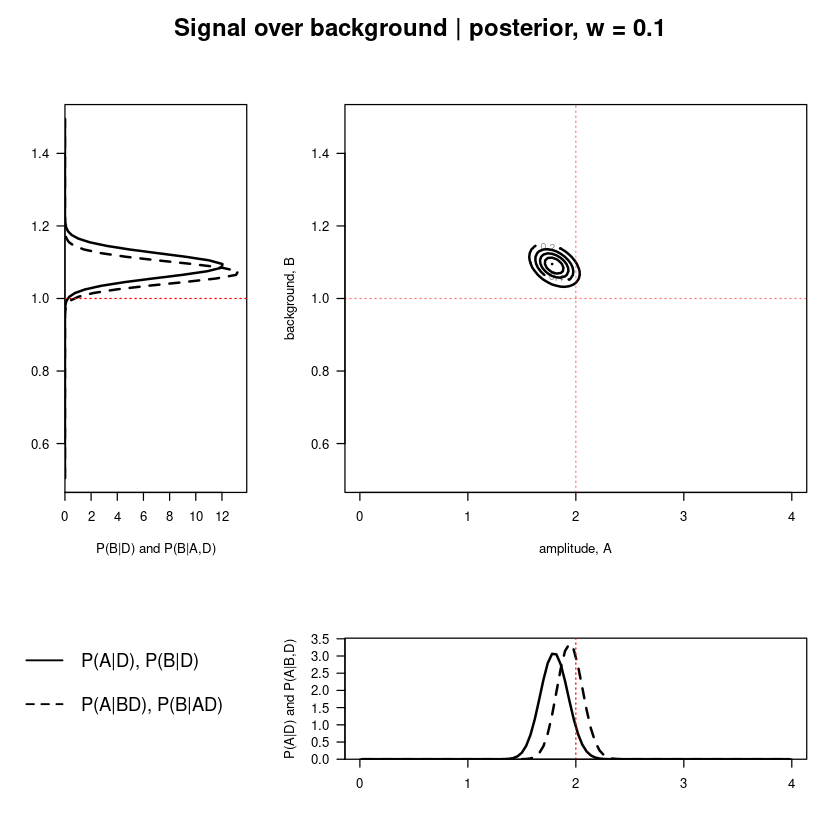

In [22]:
cat('remember: smaller w implies higher resolution!')

for(ww in rev(w_test))
    plot_snr_posterior(ww, A.true=2, B.true=1,
        title =  paste('Signal over background | posterior, w =', ww))

**Observation:** Increasing the sampling resolution we notice that the posterior distribution is increasely more peaked on the expected value for A and B.

**b |** change the ratio A/B used to simulate the data

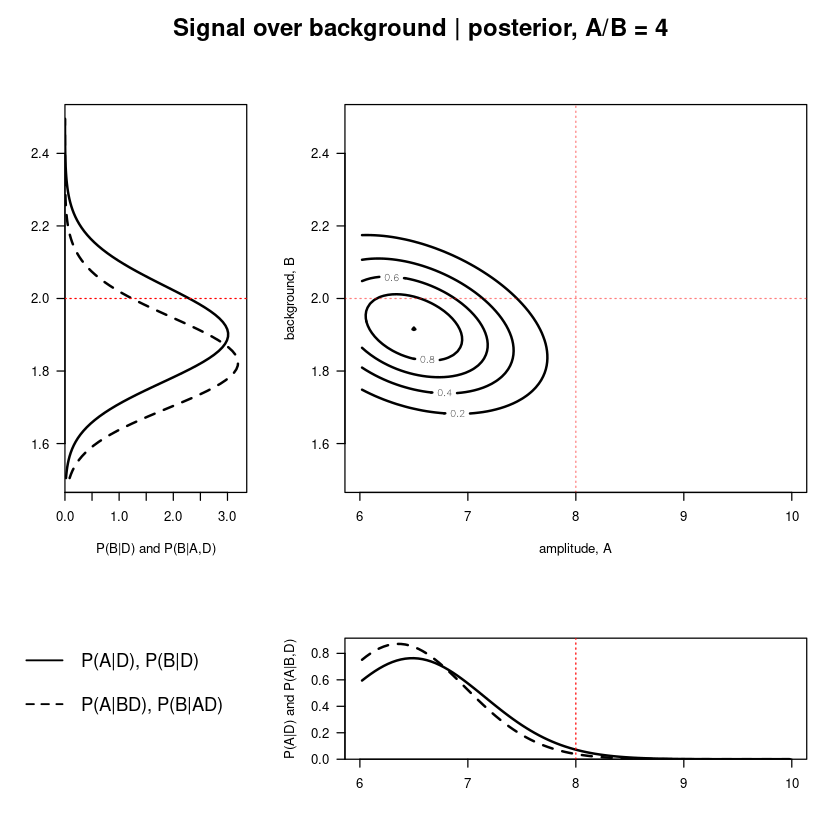

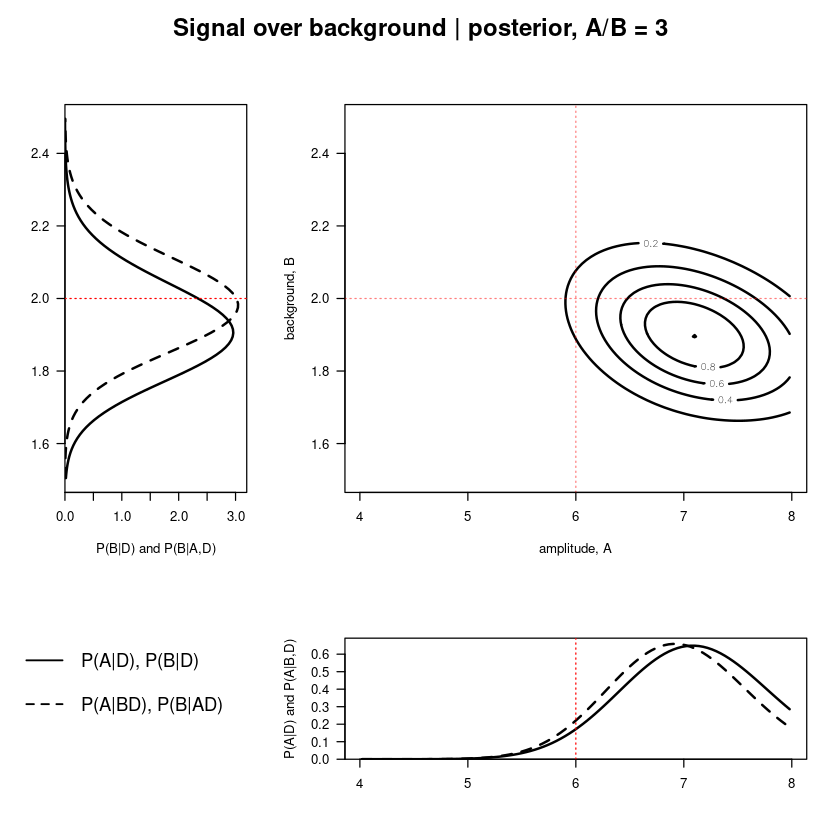

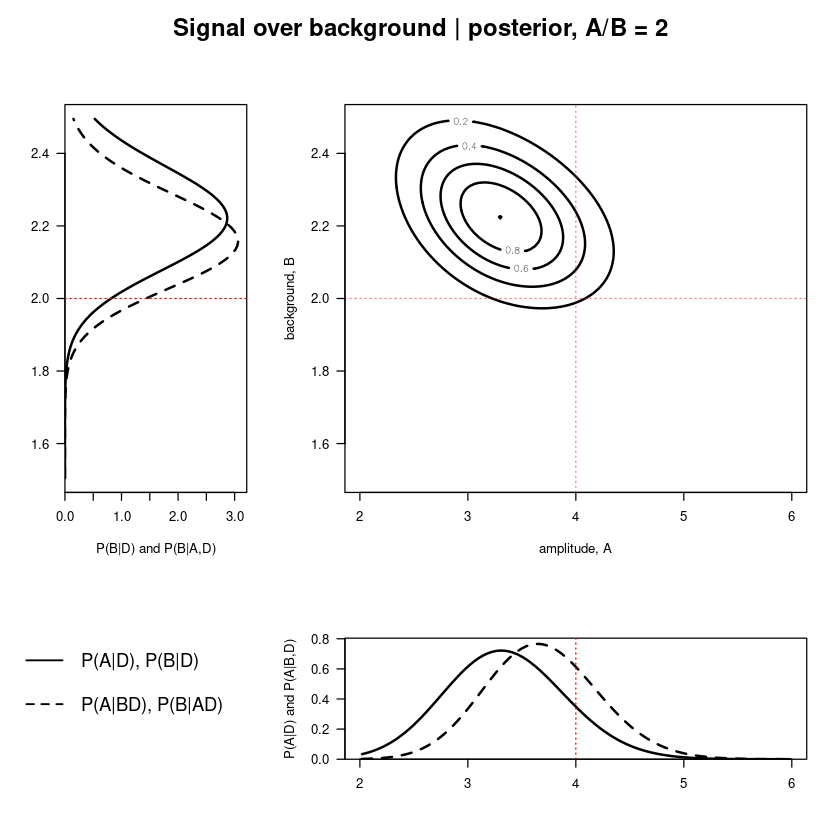

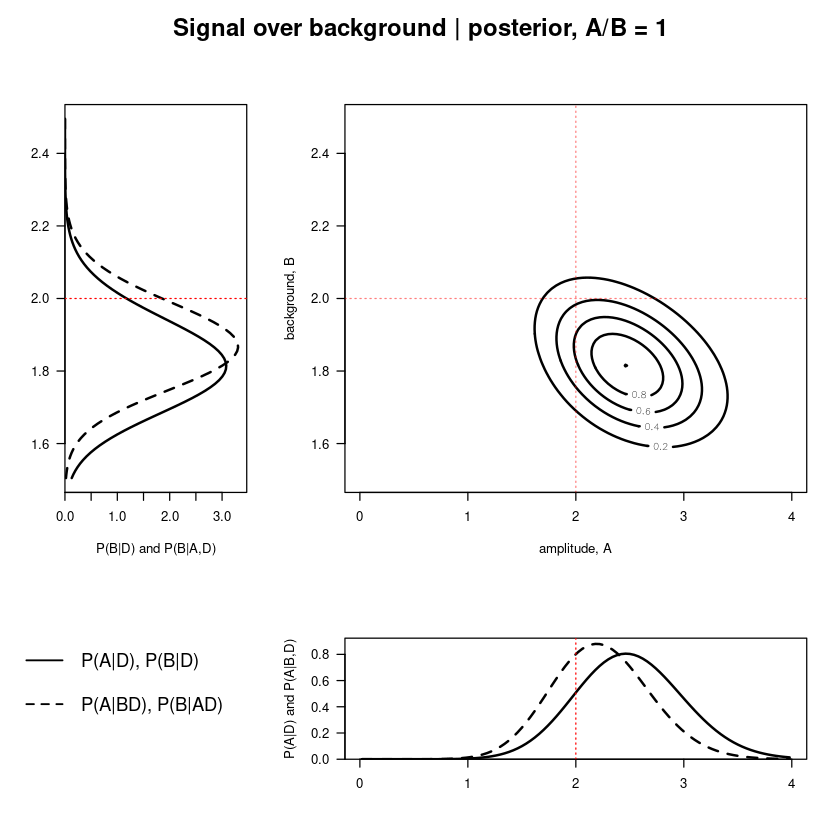

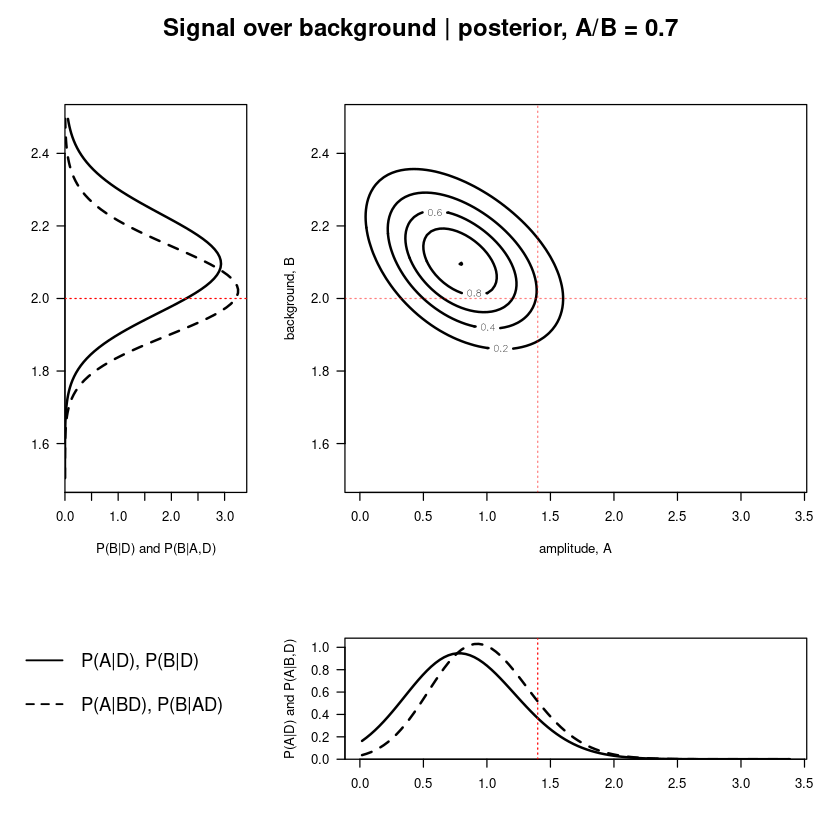

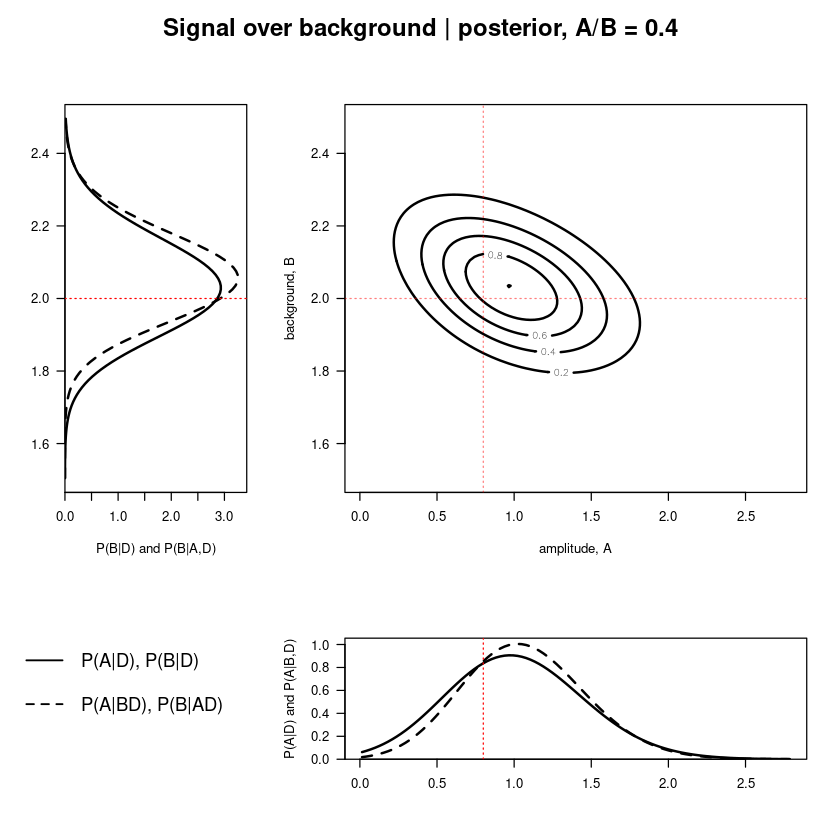

In [23]:
thisB = 2
for(snr in c(4,3,2,1,0.7,0.4))
    plot_snr_posterior(1, A.true=thisB*snr, B.true=thisB,
                       title = paste('Signal over background | posterior, A/B =', snr) )

End of file